## 데이터 가져오기
### 모듈 설정

In [169]:
import sys
assert sys.version_info >= (3, 5)

In [170]:
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

In [171]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", message="internal gelsd")

In [172]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [173]:
PROJECT_ROOT_DIR = "."
CHARTER_ID = "end_to_end_project"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHARTER_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)

In [174]:
# 그림을 저장하는 method
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution = 300):
    path = os.path.join(IMAGE_PATH, fig_id + "."+ fig_extension)
    print("그림 저장", path, fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### 데이터 다운로드

In [175]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [176]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [177]:
fetch_housing_data()

## 데이터 구조 훑어보기
### 데이터 읽어오기

In [178]:
import pandas as pd

In [179]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [180]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 데이터 간략 설명

In [181]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [182]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### 숫자형 특성의 요약 정보

In [183]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 모든 숫자형 특성의 히스토그램

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt

그림 저장 .\images\end_to_end_project\attribute_histogram_plots.png attribute_histogram_plots


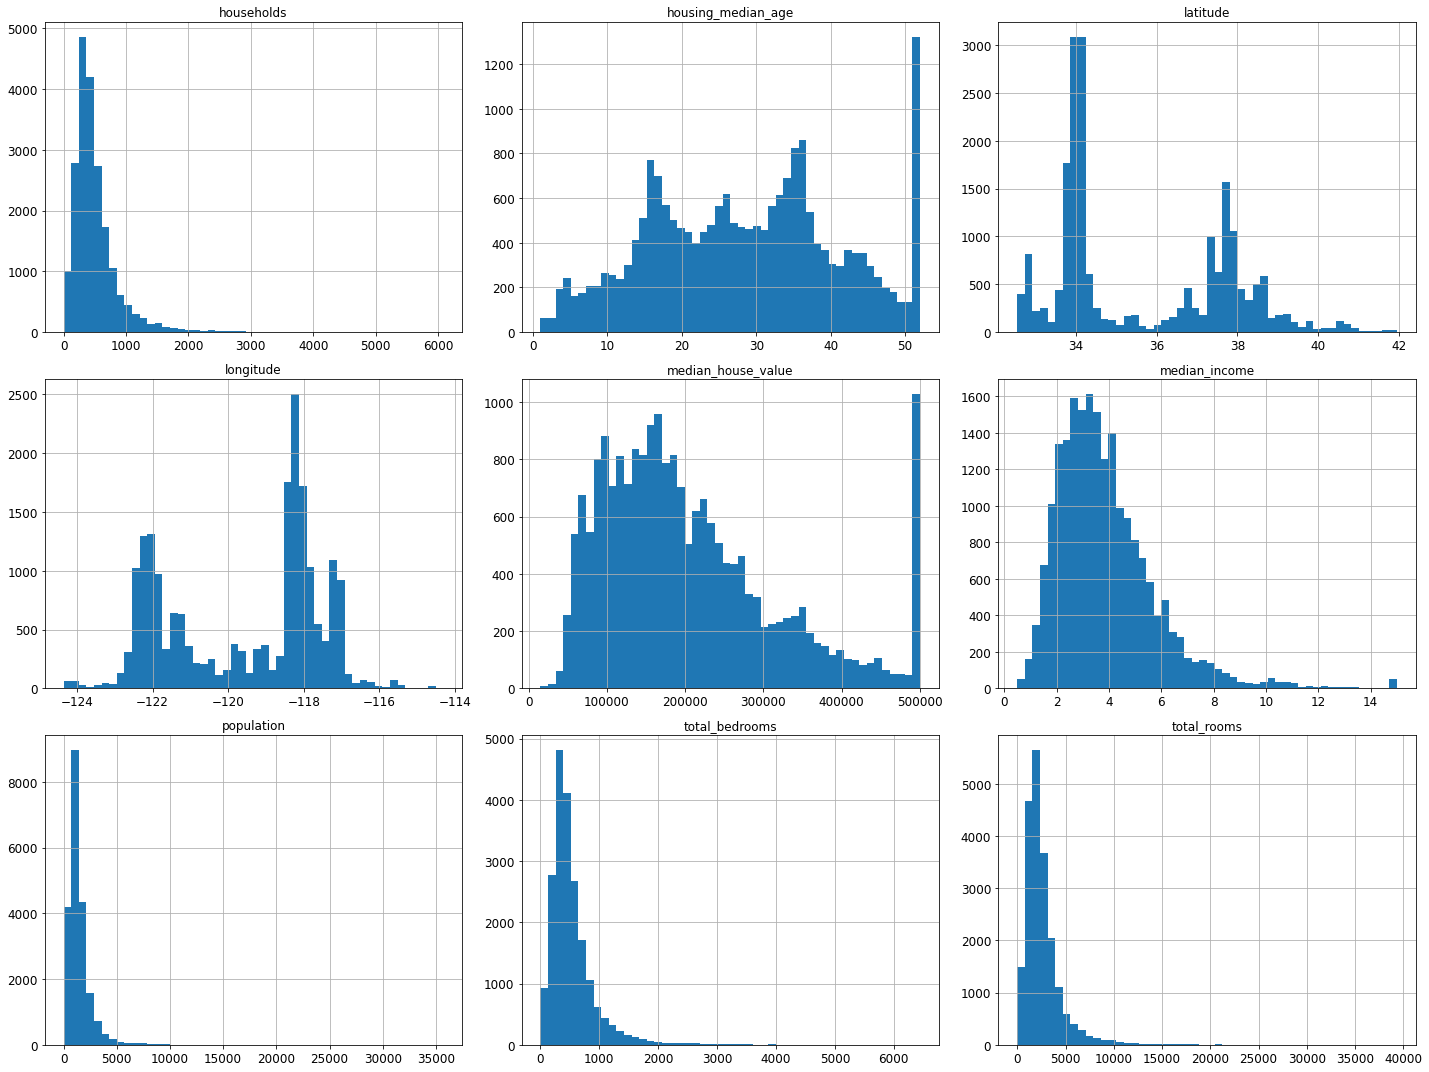

In [185]:
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [186]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


그림 저장 .\images\end_to_end_project\median_income_histogram_plots.png median_income_histogram_plots


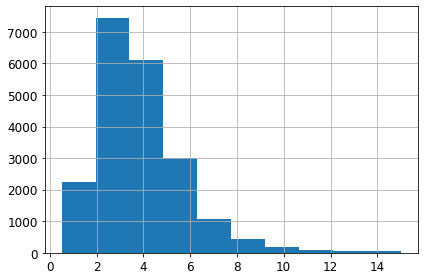

In [187]:
housing["median_income"].hist()
save_fig("median_income_histogram_plots")
plt.show()

### Median_income 카테고리 만들기

In [188]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

그림 저장 .\images\end_to_end_project\income_cat_histogram_plots.png income_cat_histogram_plots


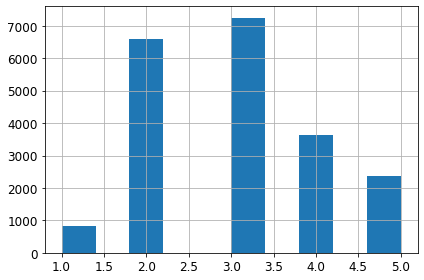

In [189]:
housing["income_cat"].hist()
save_fig("income_cat_histogram_plots")
plt.show()

## Median_income 카테고리 기반으로 계층 샘플링하기

In [190]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_trainn_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

    print(strat_test_set["income_cat"].value_counts()/len(strat_test_set))
print(housing["income_cat"].value_counts() / len(housing))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


### income_cat 컬럼 지우기

In [191]:
for set_ in (strat_trainn_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 데이터 이해하기
### 지리적 데이터 시각화

그림 저장 .\images\end_to_end_project\bad_visualization_plot.png bad_visualization_plot


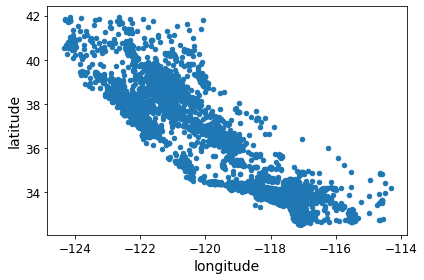

In [192]:
housing = strat_trainn_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

그림 저장 .\images\end_to_end_project\better_visualization_plot.png better_visualization_plot


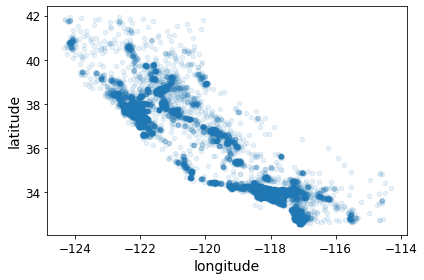

In [193]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

### 중간 주택 가격과 다른 특성 사이의 상관관계

In [194]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### 산점도 매트릭스로 상관관계 파악하기

그림 저장 .\images\end_to_end_project\scatter_matrix_plot.png scatter_matrix_plot


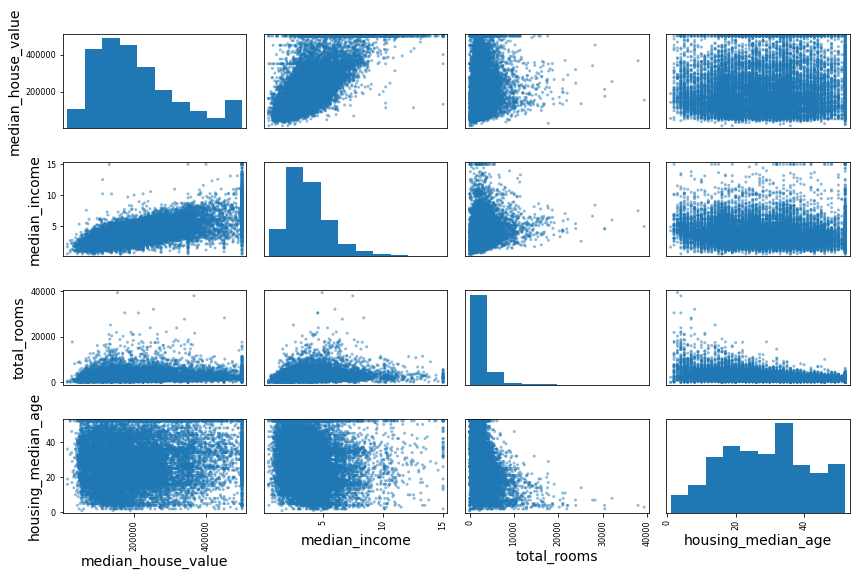

In [195]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
save_fig("scatter_matrix_plot")

## 특성 조합하기

### 개별 특성들이 그 자체로 의미를 가지나?

In [196]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
print(corr_matrix)
corr_matrix["median_house_value"].sort_values(ascending=False)

                          longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924478           -0.105848   
latitude                  -0.924478  1.000000            0.005766   
housing_median_age        -0.105848  0.005766            1.000000   
total_rooms                0.048871 -0.039184           -0.364509   
total_bedrooms             0.076598 -0.072419           -0.325047   
population                 0.108030 -0.115222           -0.298710   
households                 0.063070 -0.077647           -0.306428   
median_income             -0.019583 -0.075205           -0.111360   
median_house_value        -0.047432 -0.142724            0.114110   
rooms_per_household       -0.028345  0.107621           -0.147186   
bedrooms_per_room          0.095603 -0.116884            0.136788   
population_per_household  -0.000410  0.005420            0.015031   

                          total_rooms  total_bedrooms  population  households  \
longitude            

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 데이터 준비

### 레이블과 데이터를 분리해서 가져오기

In [197]:
housing = strat_trainn_set.drop("median_house_value", axis=1) # 훈련세트를 위해 레이블 삭제
housing_labels = strat_trainn_set["median_house_value"].copy()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


## 빈 데이터가 있을 때 정제 방법

#### 해당 구역을 제거 (Option 1)

In [198]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) # 옵션 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


#### 해당 특성을 제거 (Option 2)

In [199]:
sample_incomplete_rows.drop("total_bedrooms", axis=1) # 옵션 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


#### 특정 값으로 채움(0, 평균, 중간값 등, Option3)
##### - 스모트 라이브러리 등 알고리즘으로 채우는 방법도 있음(Option 4)

In [200]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
print(sample_incomplete_rows)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4629     -118.30     34.07                18.0       3759.0           433.0   
6068     -117.86     34.01                16.0       4632.0           433.0   
17923    -121.97     37.35                30.0       1955.0           433.0   
13656    -117.30     34.05                 6.0       2155.0           433.0   
19252    -122.79     38.48                 7.0       6837.0           433.0   

       population  households  median_income ocean_proximity  
4629       3296.0      1462.0         2.2708       <1H OCEAN  
6068       3038.0       727.0         5.1762       <1H OCEAN  
17923       999.0       386.0         4.6328       <1H OCEAN  
13656      1039.0       391.0         1.6675          INLAND  
19252      3468.0      1405.0         3.1662       <1H OCEAN  


#### 사이킷런의 SimpleImputer 사용하기(Option4)

In [201]:
from sklearn.impute import SimpleImputer

In [202]:
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [203]:
housing_num.median().values #수동계산

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [204]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index = housing_num.index)
print(sample_incomplete_rows.index)
print(sample_incomplete_rows.index.values)

housing_tr.loc[sample_incomplete_rows.index.values]

Int64Index([4629, 6068, 17923, 13656, 19252], dtype='int64')
[ 4629  6068 17923 13656 19252]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


### 텍스트와 범주형 데이터 다루기

In [205]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


#### 사이킷런의 OrdinalEncoder

In [206]:
from sklearn.preprocessing import OrdinalEncoder

In [207]:
ordinal_encoder = OrdinalEncoder()
housing_cat_enceded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_enceded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [208]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### 범주형 데이터 순서가 없으면 OneHotEncoding

In [209]:
# 데이터의 의미를 명확하게 넣어줄 수 있음 걍 0, 1 로 넣어서 숫자 학습방지
from sklearn.preprocessing import OneHotEncoder


In [210]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### 나만의 데이터 정제기

In [211]:
from sklearn.base import BaseEstimator, TransformerMixin

In [212]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 # housing.to_numpy()의 열마다 인덱스를 정함

class CombineAttributesAdder(BaseEstimator, TransformerMixin): # 클래스 선언
    
    def __init__(self, add_bedrooms_per_room = True): # *args 또는 **kargs 없음
        '''
            초기화 메소드, 객체가 만들어질 때 자동으로 호출되어 특성을 정함
        '''
        self.add_bedrooms_per_room = add_bedrooms_per_room # hyper parameter로 받은 add_bedrooms_per_room로 초기화 (True or False)
    
    def fit(self, X, y=None):
        return self # 아무것도 안함
    
    def transform(self, X, y=None):
        
        # X = housing.to_numpy() 로 가정함
        
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] # housing["households"] 당 housing["total_rooms"]
        population_per_household = X[:, population_ix] / X[:, households_ix] # housing["households"] 당 housing["population"]
        
        if self.add_bedrooms_per_room: # add_bedrooms_per_room 가 True 라면,
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] # housing["total_bedrooms"] 당 housing["total_rooms"]

            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room] # 3개의 list를 붙여서 출력
        else:
            return np.c_[X, rooms_per_household, population_per_household] # 2개의 list를 붙여서 출력 (add_bedrooms_per_room == False 일때)

In [235]:
attr_adder = CombineAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., 4.625368731563422, 2.094395280235988,
        0.22385204081632654],
       [-121.93, 37.05, 14.0, ..., 6.008849557522124, 2.7079646017699117,
        0.15905743740795286],
       [-117.2, 32.77, 31.0, ..., 4.225108225108225, 2.0259740259740258,
        0.24129098360655737],
       ...,
       [-116.4, 34.09, 9.0, ..., 6.34640522875817, 2.742483660130719,
        0.1796086508753862],
       [-118.01, 33.82, 31.0, ..., 5.50561797752809, 3.808988764044944,
        0.19387755102040816],
       [-122.45, 37.77, 52.0, ..., 4.843505477308295, 1.9859154929577465,
        0.22035541195476574]], dtype=object)

### 수치형 파이프라인

In [214]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [215]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [216]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

### 전체 파이프라인

In [217]:
from sklearn.compose import ColumnTransformer

In [218]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)
print(num_attribs, cat_attribs)
print(housing_prepared)
print(housing_prepared.shape)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] ['ocean_proximity']
[[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]
(16512, 16)


## 모델 선택과 훈련

### 훈련 세트에서 훈련하고 평가하기

In [219]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [220]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared
print(some_data)
print(some_data_prepared)
print("====================================================")
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN  
[[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
  -0.42069842 -0.61493744 -0.31205452 -0.08649871  0.15531753  1.
   0.  

In [221]:
print("예측 : ", lin_reg.predict(some_data_prepared))
print("레이블 : ", list(some_labels))

예측 :  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블 :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [222]:
from sklearn.metrics import mean_squared_error

In [223]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

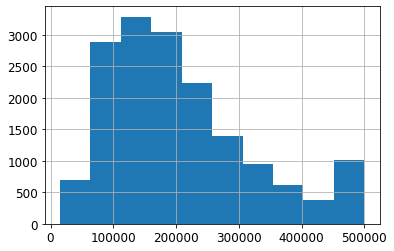

In [224]:
housing_labels.hist()

### 모델 변경하기

In [225]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [226]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 교차검증을 사용한 평가

In [227]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [228]:
def display_scores(scores):
    print("점수 : ", scores)
    print("평균 : ", scores.mean())
    print("표준 편차 : ", scores.std())
    
display_scores(tree_rmse_scores)

점수 :  [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균 :  71407.68766037929
표준 편차 :  2439.4345041191004


In [229]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 :  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균 :  69052.46136345083
표준 편차 :  2731.6740017983434


In [230]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN
